In [1]:



































































#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import copy
import math
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0, rc={'lines.linewidth': 1.5, 'figure.figsize':(8,6)})
filterwarnings('ignore')

In [2]:
#Load Dataset
insurance=pd.read_csv('insurance.csv')

In [25]:
#Get details about dataset or the overview of data
insurance.head(50)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [32]:
#to check all the five points, mean, std and total count
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


From the above table we can know the statistical values of all attributes which are numeri, so we can
see that in "bmi" attribute max value is 53.13  which can be an outlier as it is too high than the normal acceptable value.

In [11]:
#To check number of rows,columns,total entries and data type
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [41]:
#To see if any null value exists
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
pd.crosstab(insurance['charges'], insurance['smoker'])

smoker,no,yes
charges,,
1121.87390,1,0
1131.50660,1,0
1135.94070,1,0
1136.39940,1,0
1137.01100,1,0
1137.46970,1,0
1141.44510,1,0
1146.79660,1,0
1149.39590,1,0


By using above comand it is very much clear that charges ir purely depended on type of smoker, it means people who doesn't smkoes will be charged less compared to people who smokes.

In [17]:
#To see the number of males and females in entire sample of data
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

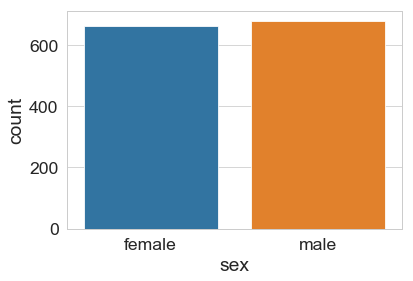

In [18]:
sns.countplot(insurance['sex'])

In [19]:
#To know the number of smokers and non-smokers present in our data set
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

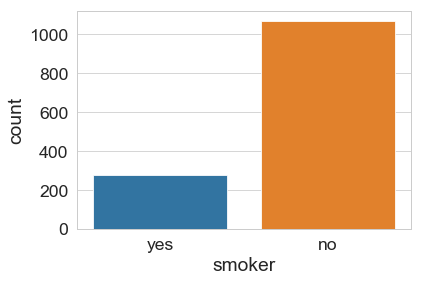

In [34]:
sns.countplot(insurance['smoker'])

From the above graph we can conclude that number of smokers present in our data set is around 20% of total sample data.

In [21]:

insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

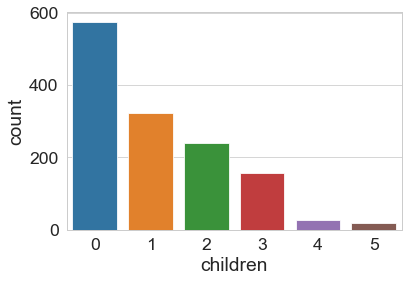

In [35]:
sns.countplot(insurance['children'])

From the above investigation performed on data set we can conclude that maximum of people are having no kid, and very less having 5 kids

In [23]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

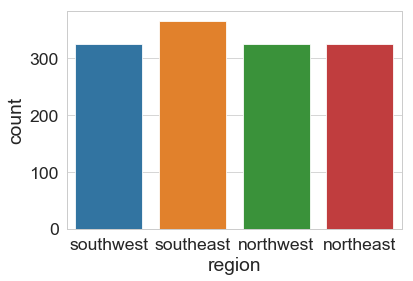

In [36]:
sns.countplot(insurance['region'])

From the above graph we can conclude that maximum of insurance are done from southeast region.

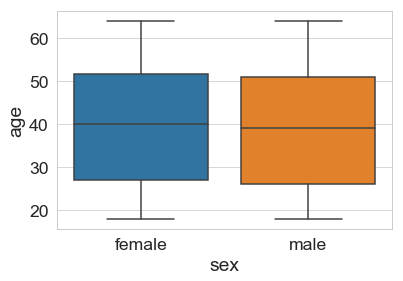

In [37]:
sns.boxplot(x='sex', y='age', data=insurance)

Both male and female in gender is equally distributed and there are no outliers present in it

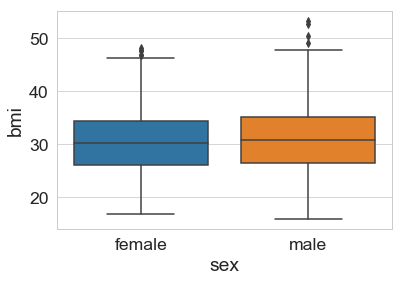

In [38]:
sns.boxplot(x='sex', y='bmi', data=insurance)

So we can see that there are more outliers present in male for the bmi.

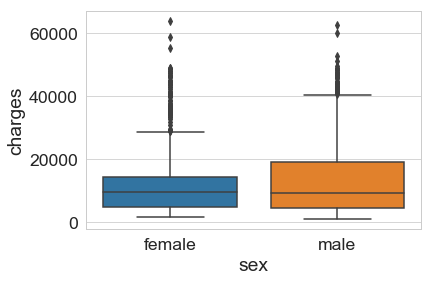

In [39]:
sns.boxplot(x='sex', y='charges', data=insurance)

When i compared charges with respect to both male and female then i came to an conclusion that chqarges paid by male is higher than female and there are outliers present in both the gendres

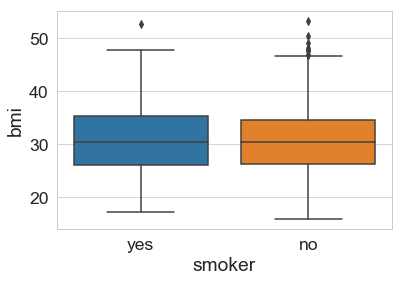

In [40]:
sns.boxplot(x='smoker', y='bmi', data=insurance)

From the above plot we can see that bmi of people who skoes doesn't have outliers and on the other hand people who don't smoke have wide range of outliers.

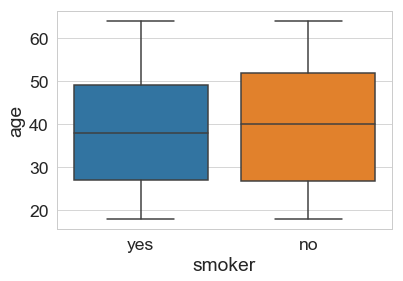

In [41]:
sns.boxplot(x='smoker', y='age', data=insurance)

Smoking with respect to smokers are almost uniformlly distributed but we can tell that people who are having more age are likely to be non-smokers.

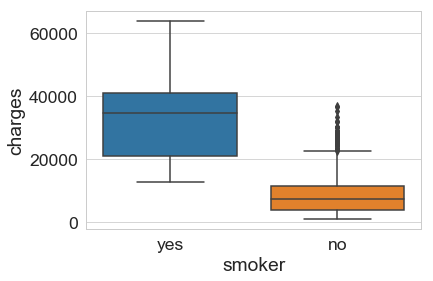

In [42]:
sns.boxplot(x='smoker', y='charges', data=insurance)

Charges when compared to smkoer then we can see that people who smokes have to pay more charges and does not have any out liers in it but people who does not smokes have to pay less charges compared to people who doen't smoke but it carries a wide range of outliers in it.

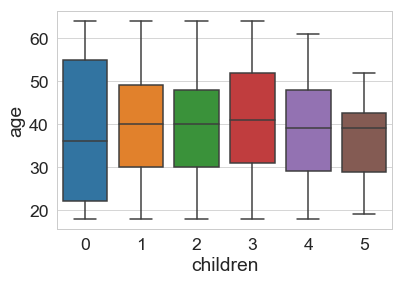

In [43]:
sns.boxplot(x='children', y='age', data=insurance)

From the above graph we can see that out of entire data set maximum people are with no kid.

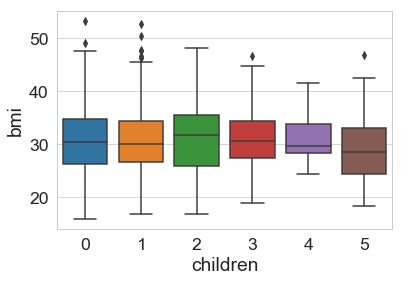

In [44]:
sns.boxplot(x='children', y='bmi', data=insurance)

There are more outliers present in bmi of persons with 1 kid.

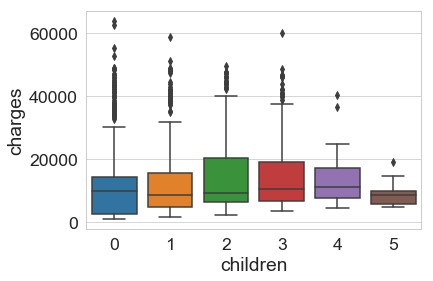

In [45]:
sns.boxplot(x='children', y='charges', data=insurance)

By performing above investigation we can condlude that peopole with no kids are paying maximum charges as there are wide range of outliers in it.

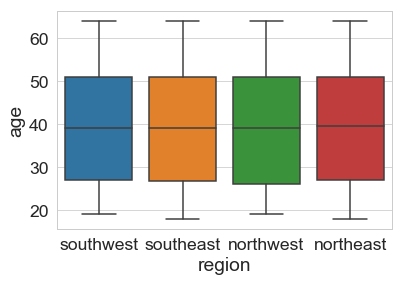

In [37]:
sns.boxplot(x='region', y='age', data=insurance)

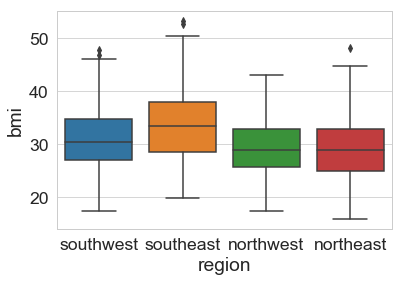

In [39]:
sns.boxplot(x='region', y='bmi', data=insurance)

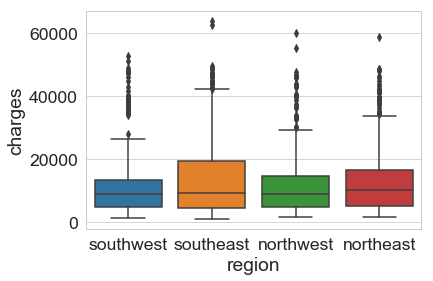

In [44]:
sns.boxplot(x='region', y='charges', data=insurance)

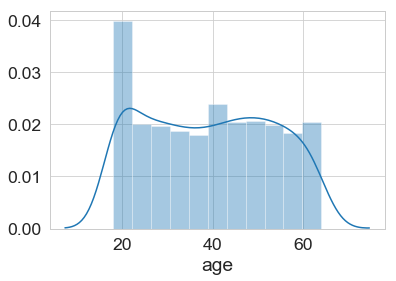

In [46]:
sns.distplot(insurance['age'], kde=True, rug=False)

From the above graph we can conclude age attribute is uniformally distributed. 

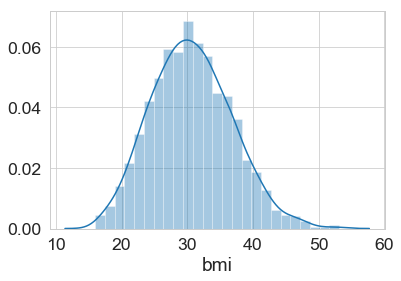

In [47]:
sns.distplot(insurance['bmi'], kde=True, rug=False)

bmi is noramlly distributed 

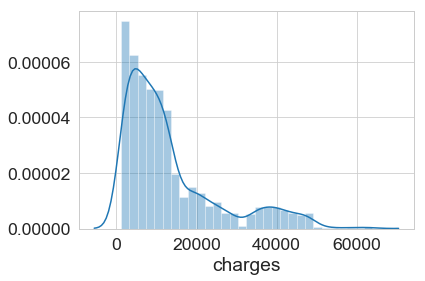

In [48]:
sns.distplot(insurance['charges'], kde=True)

charges attribute is right skewed distributed

In [49]:
skewness= pd.DataFrame({'skewness':[st.skew(insurance.bmi),st.skew(insurance.age),st.skew(insurance.charges)]}
                      , index=['bmi','age','charges'])
skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [ ]:
bmi has a few extreme values.
charges as it is highly skewed, there are quite a lot of extreme values

The number of unique value for age coloumn 47
The number of unique value for sex coloumn 2
The number of unique value for bmi coloumn 548
The number of unique value for children coloumn 6
The number of unique value for smoker coloumn 2
The number of unique value for region coloumn 4
The number of unique value for charges coloumn 1337


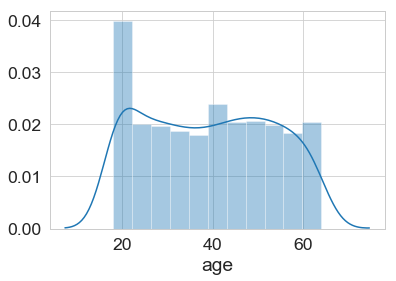

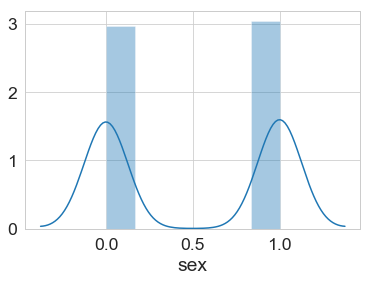

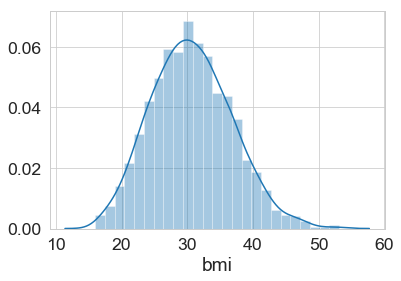

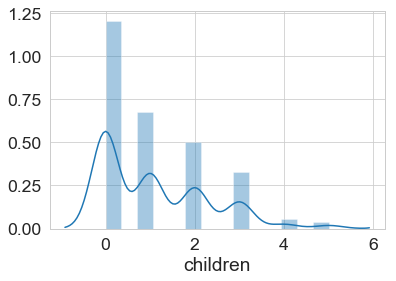

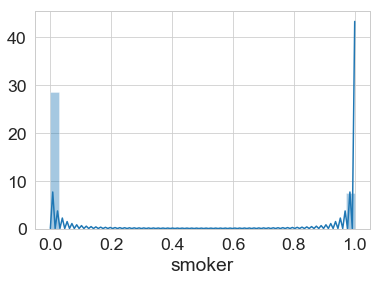

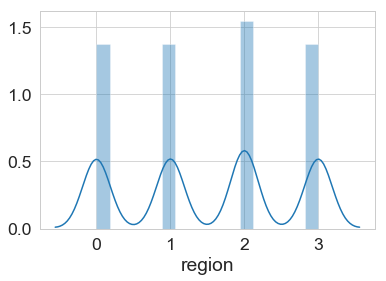

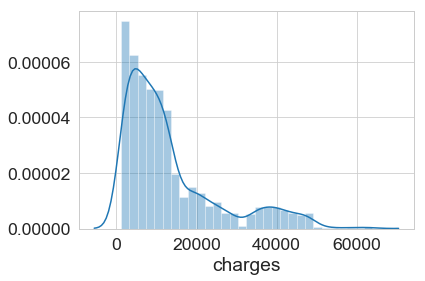

In [50]:
cols=insurance.columns.values
for col in cols:
    print("The number of unique value for {} coloumn".format(col),insurance[col].nunique())
for col in cols:
    if insurance[col].dtypes=='object':
        insurance[col]=le.fit_transform(insurance[col])
        
for col in cols:
    sns.distplot(insurance[col])
    plt.show()

Above is the distribution plot for all the attributes including categorical attributes.
from the above graph we can conclude that age is uniformally distributed, sex is noramlly distributed, bmi is uniformally distributed, charges has high right skewness.

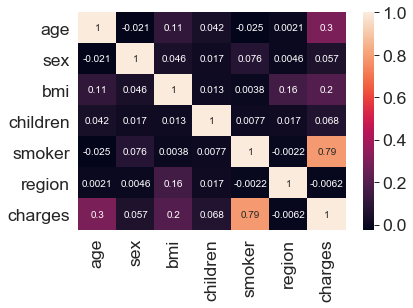

In [52]:
corr=insurance.corr()
corr
sns.heatmap(corr, annot=True)

From the above heat map we can see the relationship among all the attributes.

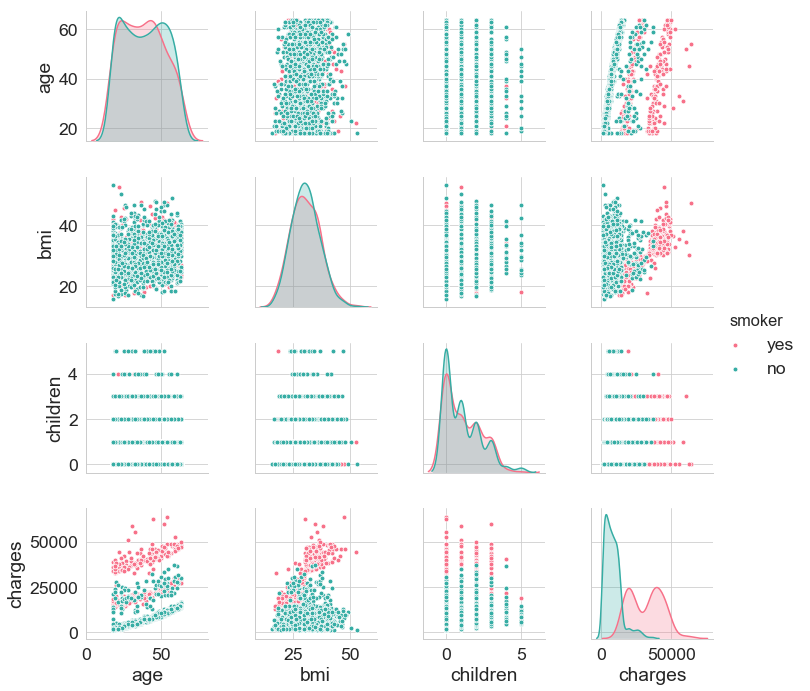

In [55]:
sns.pairplot(insurance, hue='smoker', palette='husl')

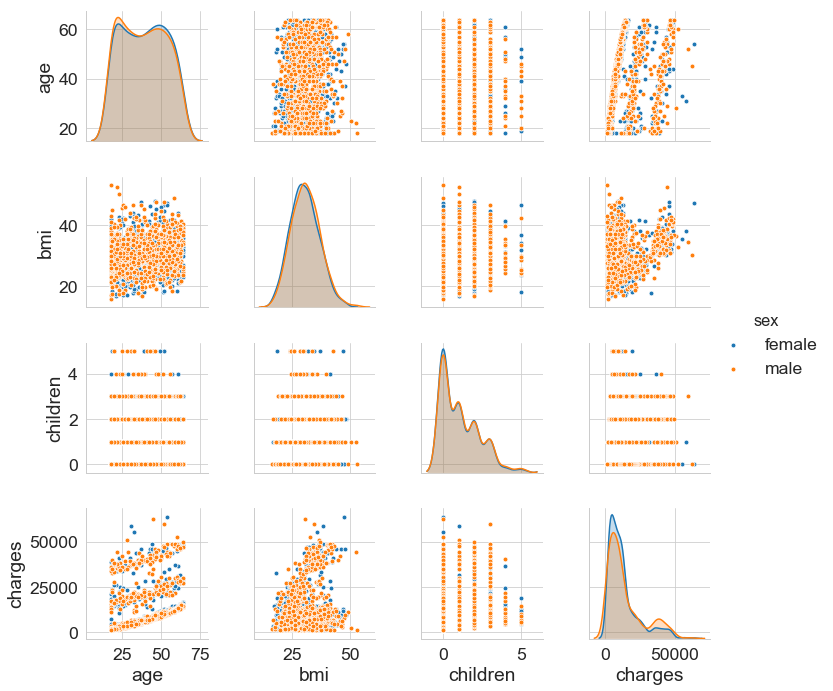

In [61]:
sns.pairplot(insurance, hue='sex')

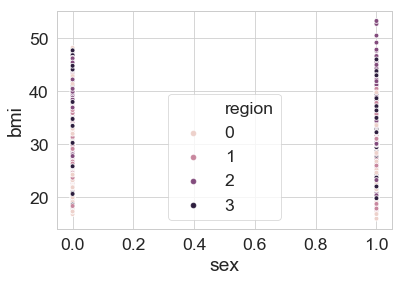

In [54]:
sns.scatterplot(x='sex', y='bmi', hue='region', data=insurance)

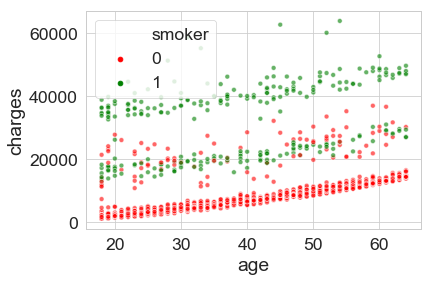

In [60]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=insurance, alpha=0.6, palette=['red','green'])

From the above plot we can see that non skomres are likely to have less charges compared to smokers.

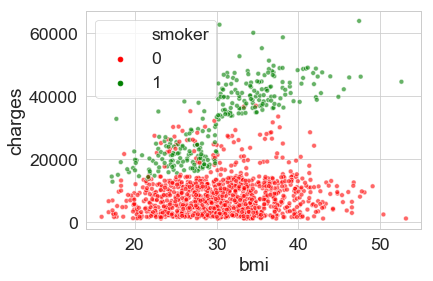

In [61]:
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=insurance, alpha=0.6, palette=['red','green'])

From the above plot we can tell that non smokers are having a range of bmi mainly from 20 to 40 with less charge and smokers are comperatively less compared to smokers and have to pay more charges.

In [34]:
type(insurance)

pandas.core.frame.DataFrame

In [35]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [62]:
insurance['charges'].mode()

0    1639.5631
dtype: float64

In [64]:
insurance['charges'].median()

9382.033

In [66]:
insurance['bmi'].mode()

0    32.3
dtype: float64

In [68]:
insurance['bmi'].median()

30.4

In [70]:
insurance['age'].mode()

0    18
dtype: int64

In [71]:
insurance['age'].median()

39.0

In [72]:
#T-test to check depedency of bmi on gender
from scipy.stats import ttest_ind
Ho="Gender has no efect on bmi"
Ha="Gender has an effect on bmi"

x=np.array(insurance[insurance.sex == 'male'].bmi)
y=np.array(insurance[insurance.sex == 'female'].bmi)

t,p_value=ttest_ind(x,y)

if p_value < 0.05:
    print(f'{Ha},as the p_value({p_value})< 0.05')
else:
    print(f'{Ho}, as the p_value({p_value})> 0.05')

Gender has no efect on bmi, as the p_value(nan)> 0.05


So by performing t-test it is pretty clear that there is no effect of gender on bmi.

In [73]:
#T-test to check depedency of charges on smokers
Ho="smoking has no efect on charges"
Ha="Smoking has an effect on charges"

x=np.array(insurance[insurance.smoker == 'yes'].charges)
y=np.array(insurance[insurance.smoker == 'no'].charges)

t,p_value=ttest_ind(x,y)

if p_value < 0.05:
    print(f'{Ha},as the p_value({p_value})< 0.05')
else:
    print(f'{Ho}, as the p_value({p_value})> 0.05')

smoking has no efect on charges, as the p_value(nan)> 0.05


By performing above t-test we can conclude that yes smkoking has an effect on charges

In [74]:
from scipy.stats import ttest_ind
Ho="smoking has no efect on genders"
Ha="Smoking has an effect on genders"

x=np.array(insurance[insurance.sex == 'yes'].smoker.nunique())
y=np.array(insurance[insurance.sex == 'no'].smoker.nunique())

t,p_value=ttest_ind(x,y)

if p_value < 0.05:
    print(f'{Ha},as the p_value({p_value})< 0.05')
else:
    print(f'{Ho}, as the p_value({p_value})> 0.05')

smoking has no efect on genders, as the p_value(nan)> 0.05


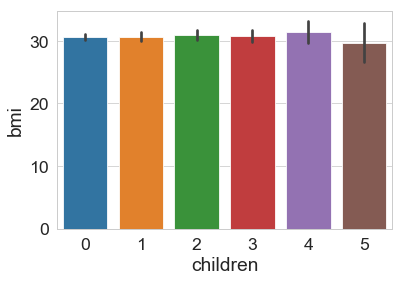

In [8]:
sns.barplot(x='children', y='bmi', data=insurance)

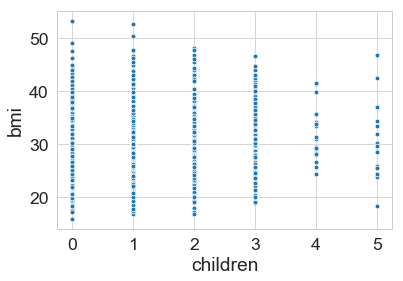

In [11]:
sns.scatterplot(x='children', y='bmi', data=insurance)

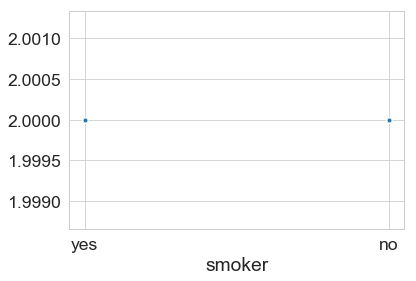

In [16]:
sns.scatterplot(insurance['smoker'], insurance['sex'].nunique())

By perfroming all above investigation on data set there are few insights which i would like to convey.
There are a lot more non-smokers than there are smokers in the data
Instances are distributed evenly accross all region
Gender is also distributed evenly
Most instances have less than 2 children and very few have 4 or 5 children
Proportion of smokers are more in male compared to female.
Charges of people who smokes are comparatively higher than who don't smokes.
So by performing t-test it is pretty clear that there is no effect of gender on bmi.